In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("2020_21_dataset.csv")

In [3]:
df.head()

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Double-double,Triple-double,Draftkings next game score
0,32,6,12,3,7,4,5,0,5,6,2,0,1,3,19,0,0,68.25
1,30,9,17,3,6,7,9,2,5,10,1,0,3,2,28,1,0,65.00
2,34,3,13,0,2,6,6,1,5,8,2,0,5,3,12,0,0,77.25
3,37,6,19,2,8,3,4,1,4,9,2,0,2,4,17,0,0,113.75
4,37,13,27,5,12,1,1,3,4,11,2,2,2,4,32,1,0,108.50


In [4]:
df.columns

Index(['Minutes played', 'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Double-double', 'Triple-double',
       'Draftkings next game score'],
      dtype='object')

In [6]:
df.shape

(57689, 18)

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf = RandomForestRegressor()

In [12]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
y_pred = rf.predict(X_test)

In [14]:
y_pred

array([51.7225 , 13.815  , 51.6175 , ..., 16.32125, 21.5825 , 59.5    ])

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

360.45727399265616

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

18.98571236463505

In [17]:
scatter_df = pd.DataFrame(np.concatenate((y_test, y_pred.reshape(-1)), axis=0), columns=['Value'])

real_predicted = ['Real Value'] * int(scatter_df.shape[0]/2) + ['Predicted Value'] * int(scatter_df.shape[0]/2)
scatter_df['Real/Predicted'] = real_predicted
scatter_df['Sample'] = list(range(int(scatter_df.shape[0]/2))) * 2
scatter_df.head(2)

,Value,Real/Predicted,Sample
0,24.25,Real Value,0
1,12.75,Real Value,1


<AxesSubplot:xlabel='Sample', ylabel='Value'>

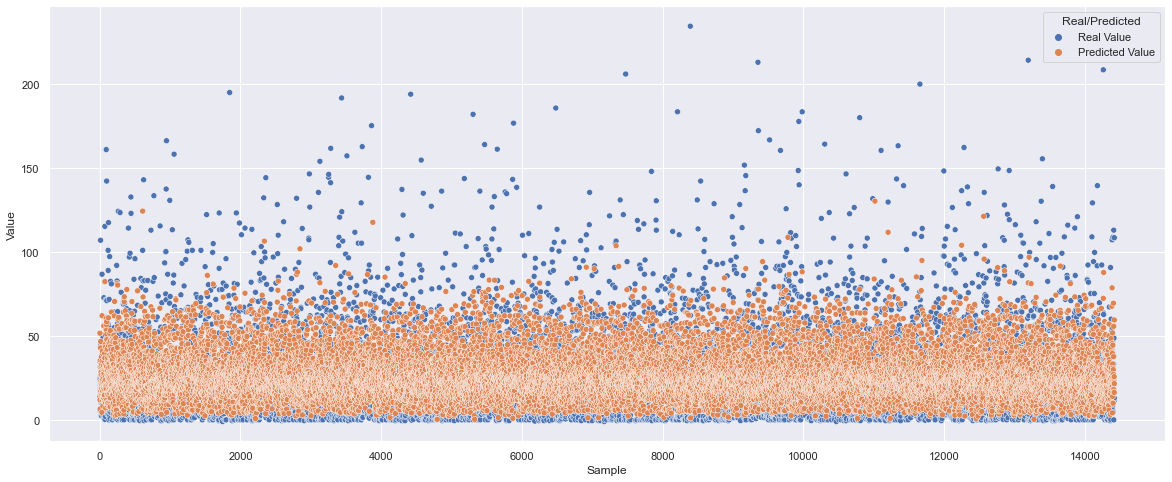

In [18]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20, 8)})
sns.scatterplot(data=scatter_df, x='Sample', y='Value', hue='Real/Predicted')